In [1]:
# https://zhuanlan.zhihu.com/p/107788754
# https://sefiks.com/2018/05/13/a-step-by-step-c4-5-decision-tree-example/

In [33]:
import numpy as np
import operator
import math
import TreePlot
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tmp = []
with open('D1.txt', 'r') as file:
    for row in file:
        row = row.replace('\n', '')
        tmp.append(row.split(' '))
D1 = np.array(tmp).astype('float')
D1

array([[0.264185, 0.178456, 0.      ],
       [0.409499, 0.213456, 1.      ],
       [0.926224, 0.540329, 1.      ],
       ...,
       [0.285166, 0.956678, 1.      ],
       [0.751571, 0.514041, 1.      ],
       [0.142654, 0.226182, 1.      ]])

In [4]:
D1F = pd.DataFrame(data=D1, columns=["x1", "x2", 'y'])

In [5]:
D1F

,x1,x2,y
0,0.264185,0.178456,0.0
1,0.409499,0.213456,1.0
2,0.926224,0.540329,1.0
3,0.573685,0.282145,1.0
4,0.953159,0.608121,1.0
...,...,...,...
995,0.211320,0.737143,1.0
996,0.625005,0.233578,1.0
997,0.285166,0.956678,1.0
998,0.751571,0.514041,1.0


In [6]:
## information entropy calculation

def EntropyCal(data):
    DataNum = data.shape[0]   # number of instances - DataNum is int
    LabelCounts = pd.DataFrame(data.iloc[:,-1].value_counts())
    # labels and numbers/counts - LabelCounts is Dataframe
    
    # Compute Shannon entropy
    Ent = 0.0;
    for i in range(LabelCounts.shape[0]):
        prob = LabelCounts.iloc[i,0].astype('double') / DataNum
        Ent -= prob * math.log(prob, 2)
    return Ent

In [7]:
## Choose the best feature under ID4.5 algorithm

def BestFeatureSelect(data):
    DataNum = data.shape[0]   # number of instances - DataNum is int
    #FeatureNum = data.shape[1]-1 # number of features - FeatureNum is int
    TotalEntropy = EntropyCal(data)   # Total information entropy
    BestFeature = -1            # Index of the best feature in the DataFrame
    Bestc = 0                 # Best threshold for the split
    MaxInfoGain = []          # Store maximum InfoGain for each feature into a list - MaxInfoGain is list
    MaxGainRatios = []        # Store InfoGain ratio of each feature into a list - MaxGainRatios is list
    Maxcs = []
    #MaxGainRatio = 0.0     # The maximum InfoGain ratio
    
    if DataNum == 2:
        for i in range(data.shape[1]-1):
            if data.iloc[0,i] != data.iloc[1,i]:
                dataSort = data.sort_values(by = data.columns[i], axis = 0, ascending = True)
                BestFeature = i
                Bestc = dataSort.iloc[1,i]
                return BestFeature, Bestc
    
    for i in range(data.shape[1]-1):#
        ## sort the data at ith feature
        dataSort = data.sort_values(by = data.columns[i], axis = 0, ascending = True)
        GainRatios = []        # Store InfoGain ratio of each feature into a list - GainRatios is list
        cs = []                   # Store c values for dividing the split
        for j in range(2,dataSort.shape[0]):#dataSort.shape[0] 
            NewEnt1 = 0
            NewEnt2 = 0
            numIV = 0
            NewGain = 0
            NewGainRatio = 0
            
            c = dataSort.iloc[j,i] #candidate thresold
            cs.append(c)
            dataSort1 = dataSort.loc[dataSort.iloc[:,i] < c,:]
            dataSort2 = dataSort.loc[dataSort.iloc[:,i] >= c,:]
            
            prob = float(dataSort1.shape[0]) / dataSort.shape[0]
            NewEnt1 = prob * EntropyCal(dataSort1)
            numIV -= prob * math.log(prob, 2)
                
            prob = float(dataSort2.shape[0]) / dataSort.shape[0]
            NewEnt2 = prob * EntropyCal(dataSort2)
            numIV -= prob * math.log(prob, 2)
            
            NewGain = TotalEntropy - NewEnt1 - NewEnt2
            NewGainRatio = NewGain/numIV
            GainRatios.append(NewGainRatio)
            
        #print(dataSort, GainRatios)
        MaxInfoGain.append(max(GainRatios))
        Maxcs.append(cs[GainRatios.index(max(GainRatios))])
    
    BestFeature = MaxInfoGain.index(max(MaxInfoGain))
    Bestc = Maxcs[MaxInfoGain.index(max(MaxInfoGain))]
    
    return BestFeature, Bestc
#dataSort, GainRatios, cs, MaxInfoGain, Maxcs, 

In [8]:
def PropertySame(data):
    for i in range(D1F.shape[0]):
        if data.iloc[0,0:-1].equals(data.iloc[i,0:-1]) == False:
            return False
    return True

In [9]:
# Acquire the major class
def MajorLabel(data):
    LabelCounts = pd.DataFrame(data.iloc[:,-1].value_counts())
    sortedLabelCounts = LabelCount.sort_values(by = "y", ascending = False)

    return sortedLabelCounts.index[0]

In [10]:
'''Recursion build up decision tree'''

def CreateDTree(data):
    
    ClassDF = pd.DataFrame(data.iloc[:,-1].value_counts())# Class dataframe

    # If only one class is in the data set
    if ClassDF.shape[0] == 1:
        return ClassDF.index[0] # return the class that is the same in the whole dataset
    # If all features are searched and all instances have same features
    if (data.shape[1] == 1) or PropertySame(data):
        return MajorLabel(data)
    
    BestFeature, Split_c = BestFeatureSelect(data)
    BestFeatureLable = data.columns[BestFeature]
    DecisionTree = {BestFeatureLable:{}}
    #FeatureValues = data.iloc[:,BestFeature]
    #UniFeatureValues = data.iloc[:,BestFeature].drop_duplicates()
    #uniqueVals = set(featValues)
    #Data = data.drop(data.columns[0], axis = 1, inplace = False)
    
    DecisionTree[BestFeatureLable]["<" + str(Split_c)]  = \
    CreateDTree(data.loc[data.iloc[:,BestFeature] < Split_c,:])
    
    DecisionTree[BestFeatureLable][">=" + str(Split_c)]  = \
    CreateDTree(data.loc[data.iloc[:,BestFeature] >= Split_c,:])
    
    return  DecisionTree

In [11]:
DTree = CreateDTree(D1F)

In [12]:
DTree

{'x2': {'<0.201829': 0.0, '>=0.201829': 1.0}}

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


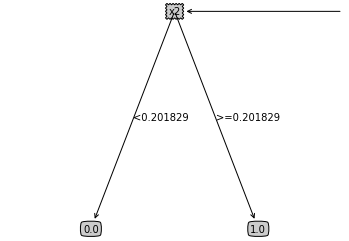

In [13]:
# Draw tree
TreePlot.createPlot(DTree)

In [14]:
P2 = np.array([[1,0,0],[0,1,0],[1,0,1],[0,1,1]])

In [15]:
P2F = pd.DataFrame(data=P2, columns=["x1", "x2", 'y'])
P2F

,x1,x2,y
0,1,0,0
1,0,1,0
2,1,0,1
3,0,1,1


(-2.0, 2.0)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


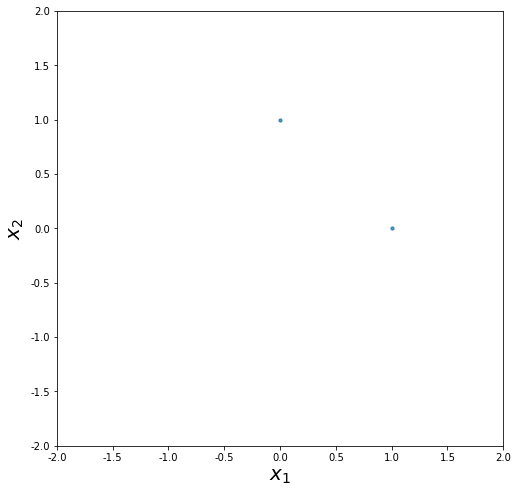

In [16]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(P2[:,0], P2[:,1], s=10, alpha=0.5)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

In [17]:
tmp = []
with open('Druns.txt', 'r') as file:
    for row in file:
        row = row.replace('\n', '')
        tmp.append(row.split(' '))
Dr = np.array(tmp).astype('float')
Dr

array([[ 0.1, -2. ,  0. ],
       [ 0. , -1. ,  1. ],
       [ 0. ,  0. ,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  2. ,  0. ],
       [ 0. ,  3. ,  0. ],
       [ 0. ,  4. ,  0. ],
       [ 0. ,  5. ,  0. ],
       [ 0. ,  6. ,  1. ],
       [ 0. ,  7. ,  0. ],
       [ 0. ,  8. ,  1. ]])

In [18]:
DrF = pd.DataFrame(data=Dr, columns=["x1", "x2", 'y'])
DrF

,x1,x2,y
0,0.1,-2.0,0.0
1,0.0,-1.0,1.0
2,0.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,2.0,0.0
5,0.0,3.0,0.0
6,0.0,4.0,0.0
7,0.0,5.0,0.0
8,0.0,6.0,1.0
9,0.0,7.0,0.0


In [19]:
DataNum = DrF.shape[0]   # number of instances - DataNum is int
FeatureNum = DrF.shape[1]-1 # number of features - FeatureNum is int
TotalEntropy = EntropyCal(DrF)   # Total information entropy
TotalEntropy

0.8453509366224365

In [21]:
i = 0
dataSort = DrF
NewEnt1 = 0
NewEnt2 = 0
numIV = 0
NewGain = 0
NewGainRatio = 0
c = DrF.iloc[0,0]
dataSort1 = dataSort.loc[dataSort.iloc[:,i] < c,:]
dataSort2 = dataSort.loc[dataSort.iloc[:,i] >= c,:]

prob = float(dataSort1.shape[0]) / dataSort.shape[0]
NewEnt1 = prob * EntropyCal(dataSort1)
numIV -= prob * math.log(prob, 2)
    
prob = float(dataSort2.shape[0]) / dataSort.shape[0]
NewEnt2 = prob * EntropyCal(dataSort2)
numIV -= prob * math.log(prob, 2)
    
NewGain = TotalEntropy - NewEnt1 - NewEnt2
NewGainRatio = NewGain/numIV
print("c = ", c, "InfoGain ratio under c:", NewGainRatio)

c =  0.1 InfoGain ratio under c: 0.10051807676021852


In [22]:
dataSort = DrF
NewEnt1 = 0
NewEnt2 = 0
numIV = 0
NewGain = 0
NewGainRatio = 0
c = DrF.iloc[0,1]
dataSort1 = dataSort.loc[dataSort.iloc[:,i] < c,:]
dataSort2 = dataSort.loc[dataSort.iloc[:,i] >= c,:]

prob = float(dataSort2.shape[0]) / dataSort.shape[0]
NewEnt2 = prob * EntropyCal(dataSort2)
numIV -= prob * math.log(prob, 2)
    
NewGain = TotalEntropy - NewEnt2
NewGainRatio = NewGain/numIV
NewGainRatio

/home/hp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


nan

In [23]:
prob

1.0

In [24]:
i = 1
dataSort = DrF
GainRatios = []        # Store InfoGain ratio of each feature into a list - GainRatios is list
cs = []                # Store c values for dividing the split
for j in range(2,dataSort.shape[0]):#dataSort.shape[0] 
    NewEnt1 = 0
    NewEnt2 = 0
    numIV = 0
    NewGain = 0
    NewGainRatio = 0
    
    c = dataSort.iloc[j,i] #candidate thresold
    cs.append(c)
    dataSort1 = dataSort.loc[dataSort.iloc[:,i] < c,:]
    dataSort2 = dataSort.loc[dataSort.iloc[:,i] >= c,:]
    
    prob = float(dataSort1.shape[0]) / dataSort.shape[0]
    NewEnt1 = prob * EntropyCal(dataSort1)
    numIV -= prob * math.log(prob, 2)
    
    prob = float(dataSort2.shape[0]) / dataSort.shape[0]
    NewEnt2 = prob * EntropyCal(dataSort2)
    numIV -= prob * math.log(prob, 2)
    
    NewGain = TotalEntropy - NewEnt1 - NewEnt2
    NewGainRatio = NewGain/numIV
    GainRatios.append(NewGainRatio)
    
pd.DataFrame(data=GainRatios, columns=["InfoGain ratio under each c=x2"])

,InfoGain ratio under each c=x2
0,0.055954
1,0.005780
2,0.001144
3,0.016411
4,0.049749
5,0.111240
6,0.236100
7,0.055954
8,0.430157


In [25]:
tmp = []
with open('D3leaves.txt', 'r') as file:
    for row in file:
        row = row.replace('\n', '')
        tmp.append(row.split(' '))
D3 = np.array(tmp).astype('float')
D3

array([[10.,  1.,  1.],
       [10.,  2.,  1.],
       [10.,  3.,  1.],
       [ 1.,  1.,  0.],
       [ 1.,  3.,  1.]])

In [26]:
D3F = pd.DataFrame(data=D3, columns=["x1", "x2", 'y'])
D3F

,x1,x2,y
0,10.0,1.0,1.0
1,10.0,2.0,1.0
2,10.0,3.0,1.0
3,1.0,1.0,0.0
4,1.0,3.0,1.0


In [27]:
DTree = {'x1': {'>=10': 1.0, '<10':{'x2':{'>=3':1.0,'<3':0.0}}}}
DTree

{'x1': {'>=10': 1.0, '<10': {'x2': {'>=3': 1.0, '<3': 0.0}}}}

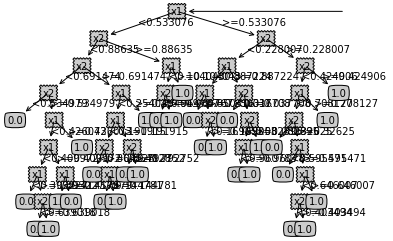

In [34]:
# Draw tree
TreePlot.createPlot(DTree)

In [29]:
tmp = []
with open('D2.txt', 'r') as file:
    for row in file:
        row = row.replace('\n', '')
        tmp.append(row.split(' '))
D2 = np.array(tmp).astype('float')
D2

array([[0.315561, 0.956006, 1.      ],
       [0.344972, 0.693422, 1.      ],
       [0.398419, 0.974354, 1.      ],
       ...,
       [0.384576, 0.609262, 0.      ],
       [0.843186, 0.848278, 1.      ],
       [0.691812, 0.751075, 1.      ]])

In [30]:
D2F = pd.DataFrame(data=D2, columns=["x1", "x2", 'y'])
D2F

,x1,x2,y
0,0.315561,0.956006,1.0
1,0.344972,0.693422,1.0
2,0.398419,0.974354,1.0
3,0.347109,0.566740,0.0
4,0.985903,0.564388,1.0
...,...,...,...
995,0.418671,0.044160,0.0
996,0.794456,0.142425,0.0
997,0.384576,0.609262,0.0
998,0.843186,0.848278,1.0


In [31]:
DTree = CreateDTree(D2F)
DTree

{'x1': {'<0.533076': {'x2': {'<0.88635': {'x2': {'<0.691474': {'x2': {'<0.534979': 0.0,
        '>=0.534979': {'x1': {'<0.426073': {'x1': {'<0.409972': {'x1': {'<0.393227': 0.0,
              '>=0.393227': {'x2': {'<0.639018': 0.0, '>=0.639018': 1.0}}}},
            '>=0.409972': {'x1': {'<0.417579': 1.0, '>=0.417579': 0.0}}}},
          '>=0.426073': 1.0}}}},
      '>=0.691474': {'x1': {'<0.254049': {'x1': {'<0.191915': {'x2': {'<0.864128': 0.0,
            '>=0.864128': {'x1': {'<0.144781': 0.0, '>=0.144781': 1.0}}}},
          '>=0.191915': {'x2': {'<0.792752': 0.0, '>=0.792752': 1.0}}}},
        '>=0.254049': 1.0}}}},
    '>=0.88635': {'x1': {'<0.104043': {'x2': {'<0.964767': 0.0,
        '>=0.964767': 1.0}},
      '>=0.104043': 1.0}}}},
  '>=0.533076': {'x2': {'<0.228007': {'x1': {'<0.887224': {'x1': {'<0.850316': 0.0,
        '>=0.850316': {'x2': {'<0.169053': 0.0, '>=0.169053': 1.0}}}},
      '>=0.887224': {'x2': {'<0.037708': 0.0,
        '>=0.037708': {'x2': {'<0.082895': {'x1

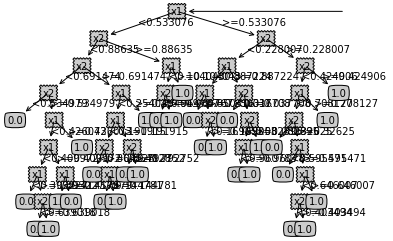

In [35]:
# Draw tree
TreePlot.createPlot(DTree)

(0.0, 1.0)

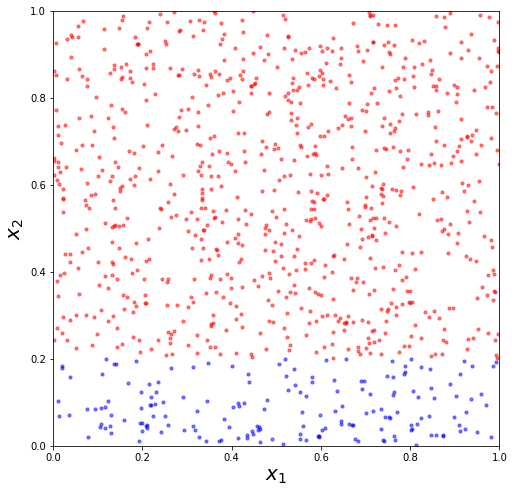

In [36]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(D1F.loc[D1F.iloc[:,-1] == 1].iloc[:,0], D1F.loc[D1F.iloc[:,-1] == 1].iloc[:,1]\
           , c = 'r', s=10, alpha=0.5)
ax.scatter(D1F.loc[D1F.iloc[:,-1] == 0].iloc[:,0], D1F.loc[D1F.iloc[:,-1] == 0].iloc[:,1]\
           , c = 'b', s=10, alpha=0.5)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_xlim([0,1])
ax.set_ylim([0,1])

(0.0, 1.0)

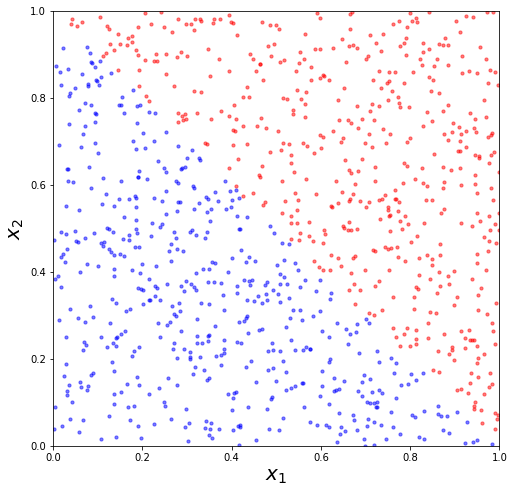

In [37]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(D2F.loc[D2F.iloc[:,-1] == 1].iloc[:,0], D2F.loc[D2F.iloc[:,-1] == 1].iloc[:,1]\
           , c = 'r', s=10, alpha=0.5)
ax.scatter(D2F.loc[D2F.iloc[:,-1] == 0].iloc[:,0], D2F.loc[D2F.iloc[:,-1] == 0].iloc[:,1]\
           , c = 'b', s=10, alpha=0.5)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_xlim([0,1])
ax.set_ylim([0,1])

(0.0, 1.0)

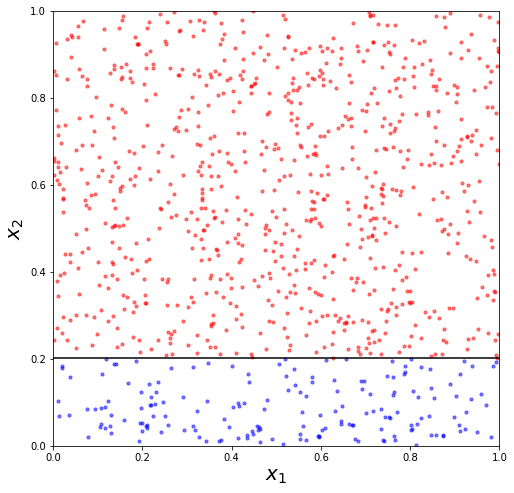

In [38]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(D1F.loc[D1F.iloc[:,-1] == 1].iloc[:,0], D1F.loc[D1F.iloc[:,-1] == 1].iloc[:,1]\
           , c = 'r', s=10, alpha=0.5)
ax.scatter(D1F.loc[D1F.iloc[:,-1] == 0].iloc[:,0], D1F.loc[D1F.iloc[:,-1] == 0].iloc[:,1]\
           , c = 'b', s=10, alpha=0.5)
ax.plot([0,1],[0.201829,0.201829],'k')
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_xlim([0,1])
ax.set_ylim([0,1])

(0.0, 1.0)

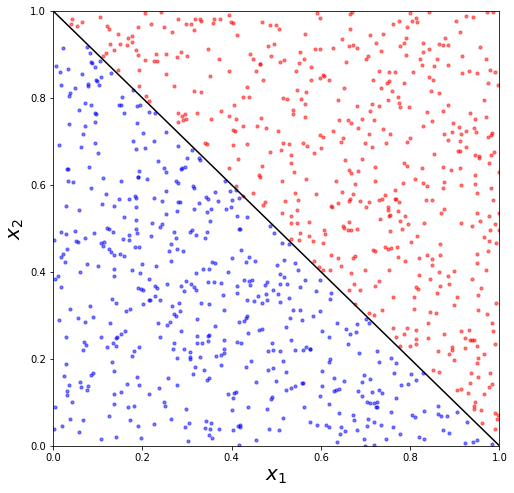

In [39]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.scatter(D2F.loc[D2F.iloc[:,-1] == 1].iloc[:,0], D2F.loc[D2F.iloc[:,-1] == 1].iloc[:,1]\
           , c = 'r', s=10, alpha=0.5)
ax.scatter(D2F.loc[D2F.iloc[:,-1] == 0].iloc[:,0], D2F.loc[D2F.iloc[:,-1] == 0].iloc[:,1]\
           , c = 'b', s=10, alpha=0.5)
ax.plot([0,1],[1,0],'k')
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_xlim([0,1])
ax.set_ylim([0,1])

In [40]:
tmp = []
with open('Dbig.txt', 'r') as file:
    for row in file:
        row = row.replace('\n', '')
        tmp.append(row.split(' '))
Db = np.array(tmp).astype('float')
Db

array([[-1.499372,  0.976384,  1.      ],
       [-1.499224, -0.517983,  1.      ],
       [-1.49888 , -1.271624,  1.      ],
       ...,
       [ 1.499284,  0.447541,  1.      ],
       [ 1.499313,  1.092598,  1.      ],
       [ 1.499767,  0.661564,  1.      ]])

In [41]:
DbF = pd.DataFrame(data=Db, columns=["x1", "x2", 'y'])
DbF

,x1,x2,y
0,-1.499372,0.976384,1.0
1,-1.499224,-0.517983,1.0
2,-1.498880,-1.271624,1.0
3,-1.498383,1.456647,1.0
4,-1.498293,-1.290862,1.0
...,...,...,...
9995,1.498964,0.036682,1.0
9996,1.499012,1.444314,1.0
9997,1.499284,0.447541,1.0
9998,1.499313,1.092598,1.0


In [42]:
DbF.iloc[8192:,:].shape

(1808, 3)

In [43]:
DbFran = DbF.sample(frac=1)
DbFran

,x1,x2,y
6622,0.517412,-1.340469,1.0
5373,0.150970,0.850879,0.0
9871,1.462674,0.091664,1.0
322,-1.399746,0.634520,1.0
129,-1.459744,0.902586,1.0
...,...,...,...
130,-1.459530,1.399699,1.0
2732,-0.663826,0.061798,0.0
1366,-1.076094,-0.603675,1.0
9748,1.426830,-0.714928,1.0


In [44]:
DbFTrain = DbFran.iloc[0:8192,:]
DbFTest = DbFran.iloc[8192:,:]

In [45]:
DbFTrainlist = []
DbFTrainlist.append(DbFTrain)
Num = [2048,512,128,32]
for i in range(4):
    Df = DbFTrainlist[i].sample(frac=Num[i]/DbFTrainlist[i].shape[0])
    DbFTrainlist.append(Df)

In [46]:
DTreelist = []
for i in range(5-1,-1,-1):
    print(i)
    DTreelist.append(CreateDTree(DbFTrainlist[i]))

4
3
2
1
0


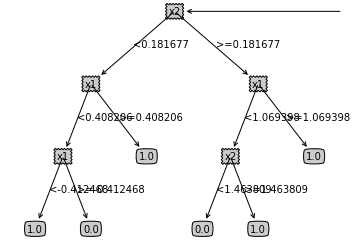

In [47]:
TreePlot.createPlot(DTreelist[0])

In [96]:
DTreelist[0]

{'x2': {'<0.181677': {'x1': {'<0.408206': {'x1': {'<-0.412468': 1.0,
      '>=-0.412468': 0.0}},
    '>=0.408206': 1.0}},
  '>=0.181677': {'x1': {'<1.069398': {'x2': {'<1.463809': 0.0,
      '>=1.463809': 1.0}},
    '>=1.069398': 1.0}}}}

In [133]:
ClassifyDecisionTree(DTreelist[0], ['x1', 'x2'], [0.0, 0.0])

x2 1 0.0 0.181677
dict_keys(['<0.181677', '>=0.181677'])
x1 0 0.0 0.408206
dict_keys(['<0.408206', '>=0.408206'])
x1 0 0.0 -0.412468
dict_keys(['<-0.412468', '>=-0.412468'])


0.0

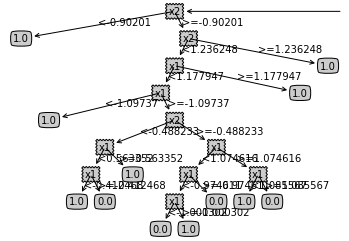

In [48]:
TreePlot.createPlot(DTreelist[1])

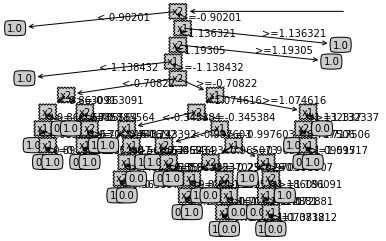

In [49]:
TreePlot.createPlot(DTreelist[2])

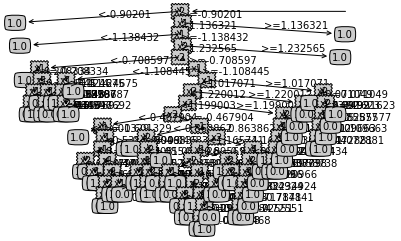

In [50]:
TreePlot.createPlot(DTreelist[3])

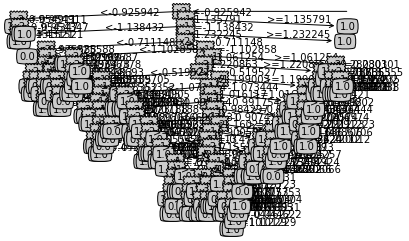

In [51]:
TreePlot.createPlot(DTreelist[4])

In [53]:
DTree = {'x1': {'>=10': 1.0, '<10':{'x2':{'>=3':1.0,'<3':0.0}}}}
DTree

{'x1': {'>=10': 1.0, '<10': {'x2': {'>=3': 1.0, '<3': 0.0}}}}

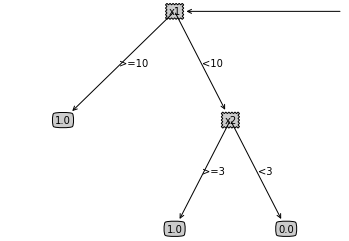

In [54]:
TreePlot.createPlot(DTree)

In [55]:
testVec = [9, 1]
featLabels = ['x1','x2']
featLabels

['x1', 'x2']

In [56]:
firstStr = list(DTree.keys())[0]
firstStr

'x1'

In [59]:
secondDict = DTree[firstStr]
float(list(secondDict.keys())[0][2:])

10.0

In [60]:
if testVec[featIndex] >= float(list(secondDict.keys())[0][2:]):
    if type(secondDict[list(secondDict.keys())[0]]).__name__ == 'dict':
        ClassLabel = secondDict[list(secondDict.keys())[0]]
    else:
        ClassLabel = secondDict[list(secondDict.keys())[0]]
        
if testVec[featIndex] < float(list(secondDict.keys())[0][2:]):
    if type(secondDict[list(secondDict.keys())[1]]).__name__ == 'dict':
        ClassLabel = secondDict[list(secondDict.keys())[1]] 
    else:
        ClassLabel = secondDict[list(secondDict.keys())[1]] 
ClassLabel

NameError: name 'featIndex' is not defined

In [137]:
def ClassifyDecisionTree(tree, featLabels, testVec):
    FirstStr = list(tree.keys())[0]
    SecondDict = tree[FirstStr]
    FeatIndex = featLabels.index(FirstStr)
    #print(FirstStr,FeatIndex,testVec[FeatIndex],float(list(SecondDict.keys())[0][1:]))
    #print(SecondDict.keys())
    
    if testVec[FeatIndex] < float(list(SecondDict.keys())[0][1:]):
        if type(SecondDict[list(SecondDict.keys())[0]]).__name__ == 'dict':
            ClassLabel = ClassifyDecisionTree(SecondDict[list(SecondDict.keys())[0]], featLabels, testVec)
        else:
            ClassLabel = SecondDict[list(SecondDict.keys())[0]]
            
    if testVec[FeatIndex] >= float(list(SecondDict.keys())[0][1:]):
        if type(SecondDict[list(SecondDict.keys())[1]]).__name__ == 'dict':
            ClassLabel = ClassifyDecisionTree(SecondDict[list(SecondDict.keys())[1]], featLabels, testVec)
        else:
            ClassLabel = SecondDict[list(SecondDict.keys())[1]]
    
    return ClassLabel

In [174]:
def nodeDecisionTree(tree, nodenum):
    nodenum = 1
    FirstStr = list(tree.keys())[0]
    SecondDict = tree[FirstStr]
    if type(SecondDict[list(SecondDict.keys())[0]]).__name__ == 'dict':
        nodenum += nodeDecisionTree(SecondDict[list(SecondDict.keys())[0]], nodenum)
    else:
        nodenum += 1
    if type(SecondDict[list(SecondDict.keys())[1]]).__name__ == 'dict':
        nodenum += nodeDecisionTree(SecondDict[list(SecondDict.keys())[1]], nodenum)
    else:
        nodenum += 1
    return nodenum

In [69]:
NodeNum = 0
nodeDecisionTree(DTree, NodeNum)

2

In [70]:
FirstStr = list(DTree.keys())[0]
FirstStr

'x1'

In [71]:
SecondDict = DTree[FirstStr]
SecondDict

{'>=10': 1.0, '<10': {'x2': {'>=3': 1.0, '<3': 0.0}}}

In [72]:
SecondDict[list(SecondDict.keys())[0]]

1.0

In [73]:
SecondDict[list(SecondDict.keys())[1]]

{'x2': {'>=3': 1.0, '<3': 0.0}}

In [74]:
type(SecondDict[list(SecondDict.keys())[0]]).__name__

'float'

In [175]:
NodeNum = 0
nodeDecisionTree(DTreelist[0], NodeNum)

11

In [176]:
NodeNum = 0
nodeDecisionTree(DTreelist[1], NodeNum)

23

In [177]:
NodeNum = 0
nodeDecisionTree(DTreelist[2], NodeNum)

71

In [178]:
NodeNumList = []
for i in range(len(DTreelist)):
    NodeNum = 0
    NodeNumList.append(nodeDecisionTree(DTreelist[i], NodeNum))

In [179]:
Num = [32,128,512,2048,8192]
NodeNumDF = pd.DataFrame({'TrainPoint': Num,'NodeNum' : NodeNumList})
NodeNumDF

,TrainPoint,NodeNum
0,32,11
1,128,23
2,512,71
3,2048,137
4,8192,279


In [138]:
for i in range(len(DTreelist)):
    DbFTest[str(NodeNumDF.iloc[i,0])] = 0
    for j in range(DbFTest.shape[0]):
        DbFTest.iloc[j,3+i] = ClassifyDecisionTree(DTreelist[i], ['x1', 'x2'], list(DbFTest.iloc[j,0:2]))

/home/hp/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/hp/.local/lib/python3.6/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/home/hp/.local/lib/python3.6/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

In [81]:
list(DbFTest.iloc[j,0:2])

[-0.779165, -0.592345]

In [139]:
DbFTest

,x1,x2,y,32,128,512,2048,8192
8361,1.006694,-0.439431,1.0,1.0,0.0,1.0,1.0,1.0
5871,0.296055,1.001742,0.0,0.0,0.0,0.0,0.0,0.0
9593,1.383577,1.134972,1.0,1.0,1.0,1.0,1.0,1.0
3086,-0.554090,-1.280910,1.0,1.0,1.0,1.0,1.0,1.0
5314,0.128571,-0.884098,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
130,-1.459530,1.399699,1.0,0.0,1.0,1.0,1.0,1.0
2732,-0.663826,0.061798,0.0,1.0,0.0,0.0,0.0,0.0
1366,-1.076094,-0.603675,1.0,1.0,1.0,1.0,1.0,1.0
9748,1.426830,-0.714928,1.0,1.0,1.0,1.0,1.0,1.0


In [140]:
Errorn = []
for i in range(len(DTreelist)):
    Errorn.append(sum(DbFTest.iloc[:,2] != DbFTest.iloc[:,3+i]))
Errorn

[504, 158, 113, 38, 31]

In [181]:
ErrornDF = pd.DataFrame({'TrainPoint': Num,'Err_n' : Errorn})
ErrornDF

,TrainPoint,Err_n
0,32,504
1,128,158
2,512,113
3,2048,38
4,8192,31


Text(0, 0.5, '$err_n$')

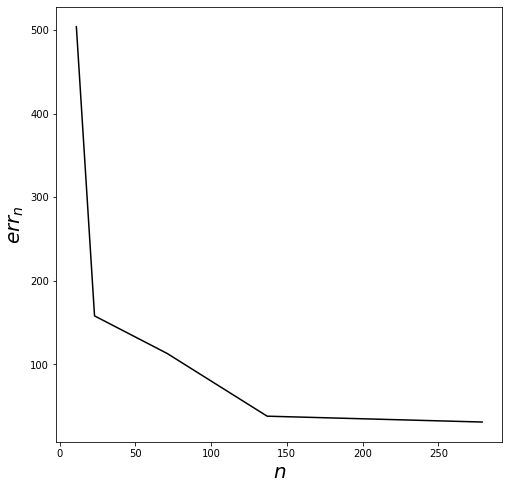

In [183]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(NodeNumDF.iloc[:,1],ErrornDF.iloc[:,1],'k')
ax.set_xlabel('$n$', fontsize=20)
ax.set_ylabel('$err_n$', fontsize=20)

In [150]:
DTreeBDF = pd.DataFrame(np.random.uniform([-3, -3], [3, 3], [10000,2]),columns = ['x1','x2'])
DTreeBDF

,x1,x2
0,-2.722021,0.355151
1,-0.634841,1.873498
2,1.863507,0.542492
3,0.127316,-0.574664
4,2.207621,2.108662
...,...,...
9995,-0.576780,-1.543104
9996,-0.557815,0.819039
9997,1.138637,-2.988555
9998,0.976738,-2.746306


In [151]:
for i in range(len(DTreelist)):
    DTreeBDF[str(NodeNumDF.iloc[i,0])] = 0
    for j in range(DTreeBDF.shape[0]):
        DTreeBDF.iloc[j,2+i] = ClassifyDecisionTree(DTreelist[i], ['x1', 'x2'], list(DTreeBDF.iloc[j,0:2]))

In [152]:
DTreeBDF

,x1,x2,32,128,512,2048,8192
0,-2.722021,0.355151,0.0,1.0,1.0,1.0,1.0
1,-0.634841,1.873498,1.0,1.0,1.0,1.0,1.0
2,1.863507,0.542492,1.0,1.0,1.0,1.0,1.0
3,0.127316,-0.574664,0.0,0.0,0.0,0.0,0.0
4,2.207621,2.108662,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...
9995,-0.576780,-1.543104,1.0,1.0,1.0,1.0,1.0
9996,-0.557815,0.819039,0.0,0.0,0.0,0.0,0.0
9997,1.138637,-2.988555,1.0,1.0,1.0,1.0,1.0
9998,0.976738,-2.746306,1.0,1.0,1.0,1.0,1.0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


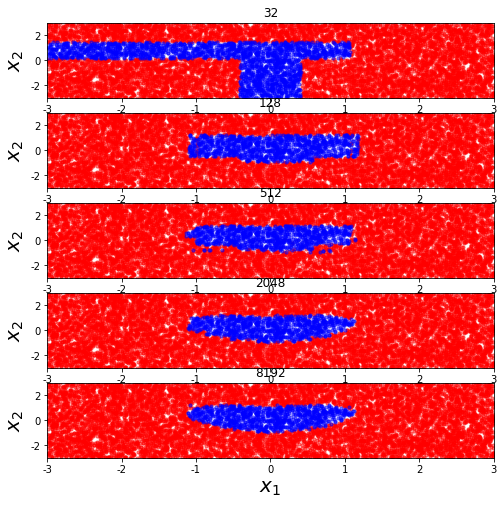

In [163]:
fig,ax = plt.subplots(5,1,figsize=(8,8))
for i in range(len(DTreelist)):
    ax[i].scatter(DTreeBDF.loc[DTreeBDF.iloc[:,2 + i] == 1].iloc[:,0], DTreeBDF.loc[DTreeBDF.iloc[:,2 + i] == 1].iloc[:,1]\
                  , c = 'r', s=10, alpha=0.5)
    ax[i].scatter(DTreeBDF.loc[DTreeBDF.iloc[:,2 + i] == 0].iloc[:,0], DTreeBDF.loc[DTreeBDF.iloc[:,2 + i] == 0].iloc[:,1]\
                  , c = 'b', s=10, alpha=0.5)
    ax[i].set_xlabel('$x_1$', fontsize=20)
    ax[i].set_ylabel('$x_2$', fontsize=20)
    ax[i].set_title(str(NodeNumDF.iloc[i,0]))
    ax[i].set_xlim([-3,3])
    ax[i].set_ylim([-3,3])

In [173]:
DbFTrainlist[4].to_csv("32.csv", columns = None, index = False)

In [166]:
DbFTrainlist[3].to_csv("128.csv", columns = None, index = False)

In [167]:
DbFTrainlist[2].to_csv("512.csv", columns = None, index = False)

In [168]:
DbFTrainlist[1].to_csv("2048.csv", columns = None, index = False)

In [185]:
DbFTrainlist[0].to_csv("8192.csv", columns = None, index = False)

In [184]:
DbFran.iloc[8192:,:].to_csv("test.csv", columns = None, index = False)

In [186]:
NodeNumList = [5, 13, 25, 61, 125]
Errorn = [432, 145, 88, 40, 32]
Num = [32,128,512,2048,8192]
NodeNumDF = pd.DataFrame({'TrainPoint': Num,'NodeNum' : NodeNumList,'Err_n':Errorn})
NodeNumDF

,TrainPoint,NodeNum,Err_n
0,32,5,432
1,128,13,145
2,512,25,88
3,2048,61,40
4,8192,125,32


Text(0, 0.5, '$err_n$')

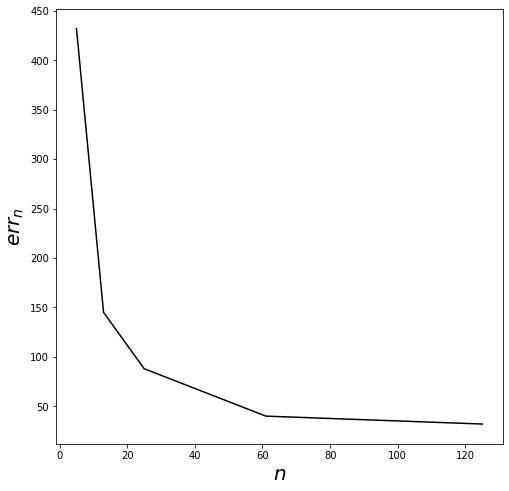

In [187]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
ax.plot(NodeNumDF.iloc[:,1],NodeNumDF.iloc[:,2],'k')
ax.set_xlabel('$n$', fontsize=20)
ax.set_ylabel('$err_n$', fontsize=20)